In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [50]:
import os
import s3fs

In [51]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

In [52]:
BUCKET="gschone"
fs.ls(BUCKET)

['gschone/MNIST_DNN.ipynb',
 'gschone/data_classif.rds',
 'gschone/data_test.csv',
 'gschone/data_train.csv',
 'gschone/don_class.rds',
 'gschone/resCLASUP.RDS',
 'gschone/test.rds']

In [53]:
BUCKET = "gschone"
FILE_KEY_S3 = "data_test.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
   df_test = pd.read_csv(file_in, sep=",")

In [54]:
BUCKET = "gschone"
FILE_KEY_S3 = "data_train.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
   df_train = pd.read_csv(file_in, sep=",")

In [71]:
df_train['Y']

0       A
1       A
2       A
3       A
4       A
       ..
1818    H
1819    H
1820    H
1821    H
1822    H
Name: Y, Length: 1823, dtype: object

In [73]:
conditions = [
    (df_train["Y"]=="H"),
    (df_train["Y"]=="D"),
    (df_train["Y"]=="A")]

choices = [0,1,2]
df_train["Yok"] = np.select(conditions, choices)

In [78]:
conditions = [
    (df_test["Y"]=="H"),
    (df_test["Y"]=="D"),
    (df_test["Y"]=="A")]

choices = [0,1,2]
df_test["Yok"] = np.select(conditions, choices)

In [81]:
x_train= df_train.drop(['Y','Yok'], axis=1)
x_test= df_test.drop(['Y','Yok'], axis=1)
y_train=df_train['Yok']
y_test=df_test['Yok']

In [90]:
num_layer1=100
num_layer2=100
model=keras.models.Sequential(name='DNN')
model.add(keras.layers.Input(1283,name='Couche_entree'))
model.add(keras.layers.Dense(num_layer1,activation='relu',name='Couche_cachee1'))
model.add(keras.layers.Dense(num_layer2,activation='relu',name='Couche_cachee2'))
model.add(keras.layers.Dense(3, activation='softmax', name='Couche_sortie'))


In [91]:
model.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Couche_cachee1 (Dense)      (None, 100)               128400    
                                                                 
 Couche_cachee2 (Dense)      (None, 100)               10100     
                                                                 
 Couche_sortie (Dense)       (None, 3)                 303       
                                                                 
Total params: 138,803
Trainable params: 138,803
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [93]:
x_train



,Home_buildUpPlaySpeed,Home_buildUpPlayPassing,Home_chanceCreationPassing,Home_chanceCreationCrossing,Home_chanceCreationShooting,Home_defencePressure,Home_defenceAggression,Home_defenceTeamWidth,Away_buildUpPlaySpeed,Away_buildUpPlayPassing,...,H10_overall_rating_ns_3,A10_overall_rating_ns_1,A10_overall_rating_ns_2,A10_overall_rating_ns_3,H11_overall_rating_ns_1,H11_overall_rating_ns_2,H11_overall_rating_ns_3,A11_overall_rating_ns_1,A11_overall_rating_ns_2,A11_overall_rating_ns_3
0,1.228592,1.333618,1.701760,1.062186,-0.297978,-0.980282,1.733190,-1.743878,1.228592,1.333618,...,-0.264275,-0.024107,0.553293,-0.319207,-0.094465,0.515357,-0.300625,-0.076819,0.532216,-0.315387
1,-0.142604,1.333618,0.799448,1.062186,0.156257,0.018986,1.733190,-0.633128,1.228592,0.561848,...,-0.288107,0.075555,0.358990,0.563986,0.320899,0.490268,-0.285246,0.448575,0.332462,0.181773
2,-0.142604,1.333618,1.701760,1.062186,-0.752213,-0.980282,1.733190,-1.743878,-0.599670,-1.367576,...,-0.288107,0.579401,0.372723,-0.135779,0.415672,0.455384,-0.259688,0.280121,0.343233,0.365626
3,1.228592,1.333618,1.701760,1.062186,1.518962,2.517155,1.733190,2.143748,0.862940,-1.753460,...,-0.321808,0.564481,0.343241,-0.001754,0.415672,0.455384,-0.259688,0.555619,0.337184,0.019042
4,1.228592,0.561848,1.250604,1.062186,0.610492,0.018986,1.268528,-0.633128,-0.142604,1.333618,...,-0.316017,0.146667,0.541958,-0.312668,-0.066975,0.535476,-0.312361,0.180847,0.533189,-0.315964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,0.223048,-2.062168,-2.087949,-0.345304,0.973880,0.618547,-0.683054,0.144398,-0.965322,0.098787,...,0.257900,0.546608,0.396907,-0.187959,0.588505,0.363739,-0.120217,0.180847,0.533189,-0.315964
1819,0.954353,-1.136045,-0.914944,0.217692,1.337268,-0.580575,-0.961851,-0.522053,0.862940,1.487972,...,0.077494,-0.024107,0.553293,-0.319207,0.324850,0.339254,0.321150,0.180847,0.533189,-0.315964
1820,0.223048,-1.830637,-1.727024,-0.908300,0.792186,-0.280794,-0.683054,0.366548,-0.873909,-0.364275,...,-0.137387,-0.130676,0.440725,-0.254265,0.585039,0.347058,-0.050069,-0.004071,0.555713,-0.329312
1821,-0.234018,-0.441452,-0.373557,-0.720635,-1.297296,1.118181,0.246271,0.033323,-1.056736,0.870556,...,-0.321808,-0.024107,0.553293,-0.319207,0.320899,0.490268,-0.285246,0.440407,0.442895,-0.248959


In [94]:
hist = model.fit(x_train,
                 y_train,
                 batch_size=500,
                 epochs=20,
                 validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 1s 148ms/step - loss: 1.1602 - accuracy: 0.3594 - val_loss: 1.6129 - val_accuracy: 0.2247
Epoch 2/20
3/3 [==============================] - 0s 41ms/step - loss: 0.8935 - accuracy: 0.5562 - val_loss: 2.0618 - val_accuracy: 0.1507
Epoch 3/20
3/3 [==============================] - 0s 41ms/step - loss: 0.7818 - accuracy: 0.6564 - val_loss: 2.5197 - val_accuracy: 0.1041
Epoch 4/20
3/3 [==============================] - 0s 39ms/step - loss: 0.6879 - accuracy: 0.7435 - val_loss: 2.8844 - val_accuracy: 0.1123
Epoch 5/20
3/3 [==============================] - 0s 50ms/step - loss: 0.6051 - accuracy: 0.7833 - val_loss: 3.2455 - val_accuracy: 0.1068
Epoch 6/20
3/3 [==============================] - 0s 37ms/step - loss: 0.5353 - accuracy: 0.8230 - val_loss: 3.5581 - val_accuracy: 0.1068
Epoch 7/20
3/3 [==============================] - 0s 37ms/step - loss: 0.4685 - accuracy: 0.8772 - val_loss: 3.8258 - val_accuracy: 0.1041
Epoch 8/20
3/3 [==========

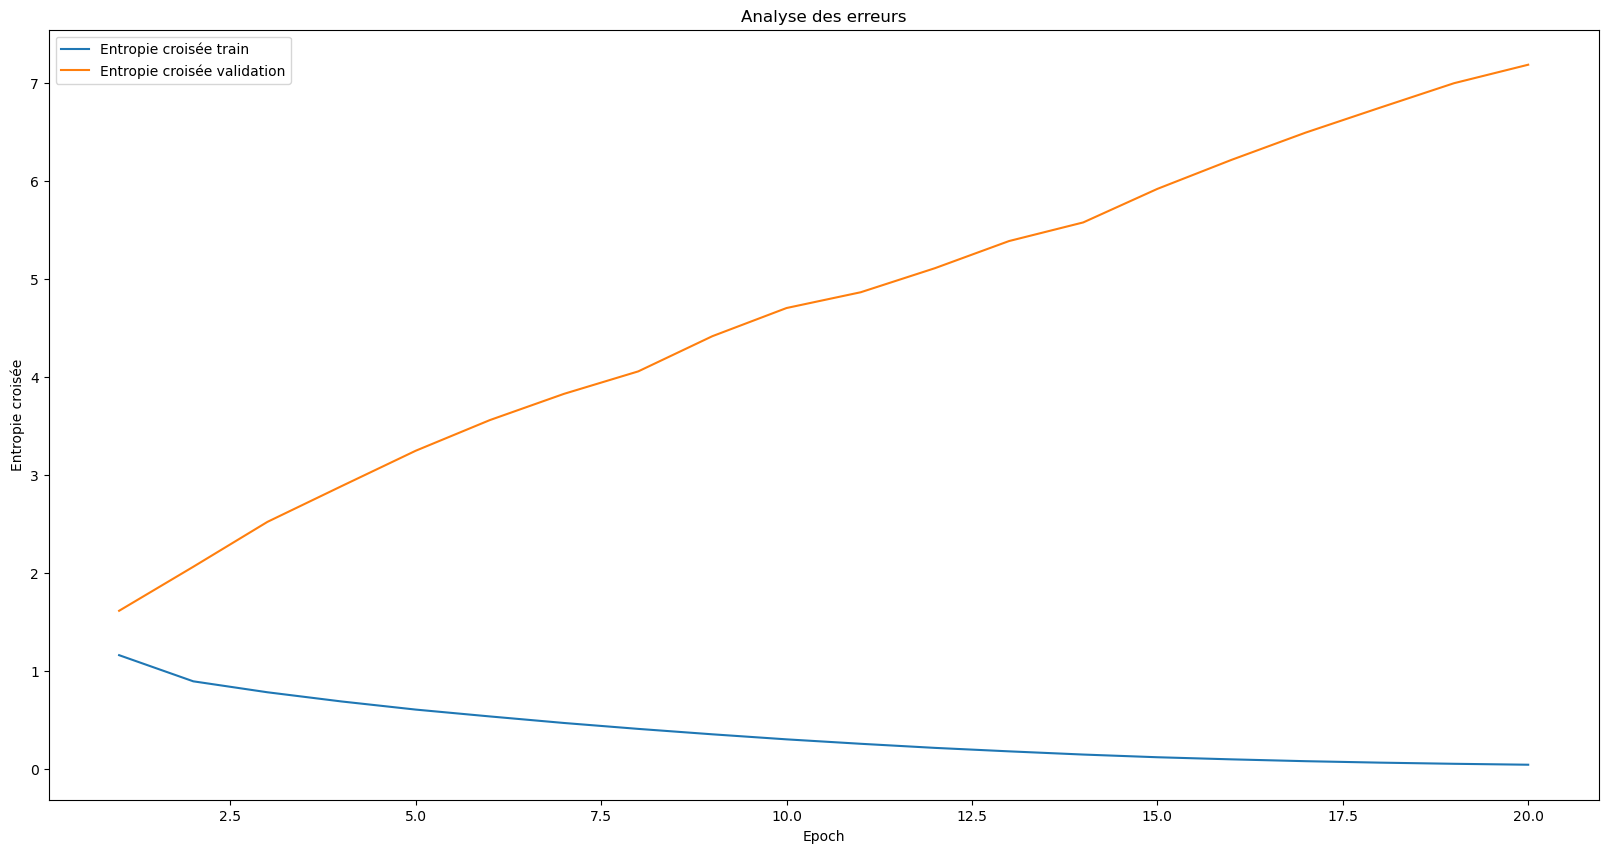

In [97]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('Entropie croisée')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Entropie croisée train', 'Entropie croisée validation'])
plt.show()

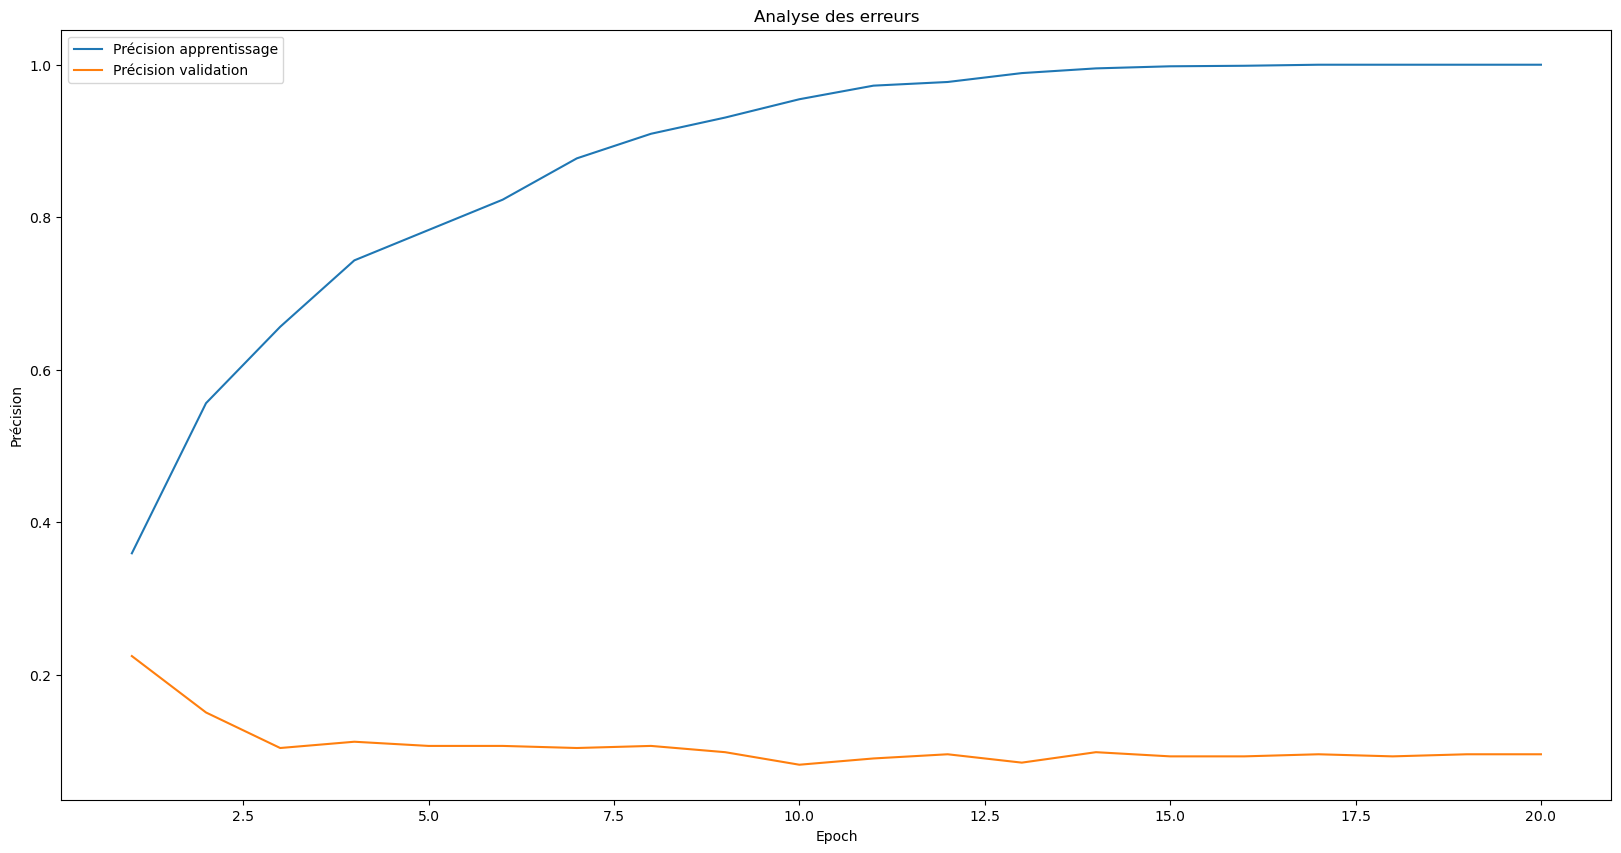

In [98]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.plot(range(1, len(hist.history['accuracy']) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.history['val_accuracy']) + 1), hist.history['val_accuracy'])
plt.legend(['Précision apprentissage', 'Précision validation'])
plt.show()

In [100]:
test=model.predict(x_test)

15/15 [==============================] - 0s 3ms/step


In [104]:
test.ndim

2